In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [8]:
df = pd.read_csv('../data/car_price.csv')
df.head()

,Make,Model,Year,Mileage,Fuel Type,Engine Size,Transmission,Body Type,Color,Owner History,Price,Age
0,Nissan,Model D,2006,244586,Diesel,1.1,Automatic,Coupe,Red,Third Owner,6501.73,17
1,Honda,Model D,2006,89556,Electric,4.4,Automatic,Coupe,Gray,Second Owner,15860.51,17
2,Ford,Model E,2007,258273,Hybrid,1.4,Manual,SUV,Black,First Owner,8136.09,16
3,Kia,Model E,2023,217592,Electric,3.7,Automatic,Coupe,Red,Second Owner,18556.40,0
4,Chevrolet,Model C,2002,256919,Hybrid,2.8,Manual,SUV,Blue,Third Owner,7486.00,21


In [9]:
df.shape

(2000, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           2000 non-null   object 
 1   Model          2000 non-null   object 
 2   Year           2000 non-null   int64  
 3   Mileage        2000 non-null   int64  
 4   Fuel Type      2000 non-null   object 
 5   Engine Size    2000 non-null   float64
 6   Transmission   2000 non-null   object 
 7   Body Type      2000 non-null   object 
 8   Color          2000 non-null   object 
 9   Owner History  2000 non-null   object 
 10  Price          2000 non-null   float64
 11  Age            2000 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 187.6+ KB


In [49]:
df.isnull().sum()

Car Brand        0
Model            0
Year             0
Mileage          0
Fuel Type        0
Engine Size      0
Transmission     0
Body Type        0
Color            0
Owner History    0
Price            0
Age              0
dtype: int64

In [11]:
df.describe()

,Year,Mileage,Engine Size,Price,Age
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,2011.525000,154012.762000,2.973650,14482.38923,11.475000
std,6.936313,83896.923133,1.155356,4641.41841,6.936313
min,2000.000000,5033.000000,1.000000,3547.69000,0.000000
25%,2005.000000,81200.500000,2.000000,10932.86750,5.000000
50%,2011.000000,154376.000000,2.900000,14533.96500,12.000000
75%,2018.000000,226905.250000,4.000000,17770.55000,18.000000
max,2023.000000,299962.000000,5.000000,28859.60000,23.000000


In [12]:
df.columns

Index(['Make', 'Model', 'Year', 'Mileage', 'Fuel Type', 'Engine Size',
       'Transmission', 'Body Type', 'Color', 'Owner History', 'Price', 'Age'],
      dtype='object')

In [13]:
col = df.select_dtypes('object').columns
for i in col:
    print('Unique values in columns "{}": {}'.format(i, df[i].nunique()))
    print('-------------------------------------------------------------')
    print('Value counts: "{}" \n{}'.format(i,df[i].value_counts()))
    print('-------------------------------------------------------------')


Unique values in columns "Make": 10
-------------------------------------------------------------
Value counts: "Make" 
Make
Mercedes      209
Chevrolet     208
Hyundai       208
Ford          203
Kia           203
Honda         199
Toyota        199
Volkswagen    192
BMW           192
Nissan        187
Name: count, dtype: int64
-------------------------------------------------------------
Unique values in columns "Model": 5
-------------------------------------------------------------
Value counts: "Model" 
Model
Model B    416
Model A    408
Model D    407
Model E    390
Model C    379
Name: count, dtype: int64
-------------------------------------------------------------
Unique values in columns "Fuel Type": 4
-------------------------------------------------------------
Value counts: "Fuel Type" 
Fuel Type
Diesel      516
Petrol      502
Hybrid      496
Electric    486
Name: count, dtype: int64
-------------------------------------------------------------
Unique values in columns "

In [18]:
df.rename(columns={'Make':'Car Brand'},inplace=True)

In [20]:
df.head(2)

,Car Brand,Model,Year,Mileage,Fuel Type,Engine Size,Transmission,Body Type,Color,Owner History,Price,Age
0,Nissan,Model D,2006,244586,Diesel,1.1,Automatic,Coupe,Red,Third Owner,6501.73,17
1,Honda,Model D,2006,89556,Electric,4.4,Automatic,Coupe,Gray,Second Owner,15860.51,17


In [21]:
print("Categories in 'Car Brand' variable:   ",end=" ")
print(df['Car Brand'].unique())

print("Categories in 'Model' variables:   ",end=" ")
print(df['Model'].unique())

print("Categories in 'Year' variables:   ",end=" ")
print(df['Year'].unique())

print("Categories in 'Fuel type' variables:  ",end=" ")
print(df['Fuel Type'].unique())

print("Categories in 'Transmission' variables:  ",end=" ")
print(df['Transmission'].unique())

print("Categories in 'Body Type' variables:  ",end=" ")
print(df['Body Type'].unique())

print("Categories in 'Color' variables:  ",end=" ")
print(df['Color'].unique())

print("Categories in 'Owner History' variables:  ",end=" ")
print(df['Owner History'].unique())

Categories in 'Car Brand' variable:    ['Nissan' 'Honda' 'Ford' 'Kia' 'Chevrolet' 'Volkswagen' 'Mercedes' 'BMW'
 'Toyota' 'Hyundai']
Categories in 'Model' variables:    ['Model D' 'Model E' 'Model C' 'Model B' 'Model A']
Categories in 'Year' variables:    [2006 2007 2023 2002 2004 2019 2013 2001 2011 2022 2000 2008 2010 2021
 2016 2003 2014 2005 2009 2020 2018 2017 2012 2015]
Categories in 'Fuel type' variables:   ['Diesel' 'Electric' 'Hybrid' 'Petrol']
Categories in 'Transmission' variables:   ['Automatic' 'Manual' 'CVT']
Categories in 'Body Type' variables:   ['Coupe' 'SUV' 'Truck' 'Hatchback' 'Sedan']
Categories in 'Color' variables:   ['Red' 'Gray' 'Black' 'Blue' 'White']
Categories in 'Owner History' variables:   ['Third Owner' 'Second Owner' 'First Owner']


In [48]:
num_feature = [feature for feature in df.columns if df[feature].dtype !='O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(num_feature), num_feature))
print('We have {} categorical features : {}'.format(len(cat_feature), cat_feature))

We have 5 numerical features : ['Year', 'Mileage', 'Engine Size', 'Price', 'Age']
We have 7 categorical features : ['Car Brand', 'Model', 'Fuel Type', 'Transmission', 'Body Type', 'Color', 'Owner History']


In [ ]:
#Treating missing values but there is no missing values
null_cols = df.columns[df.isnull().any()]
for i in null_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [25]:
df.columns = df.columns.str.strip()

In [27]:
df.head(2)

,Car Brand,Model,Year,Mileage,Fuel Type,Engine Size,Transmission,Body Type,Color,Owner History,Price,Age
0,Nissan,Model D,2006,244586,Diesel,1.1,Automatic,Coupe,Red,Third Owner,6501.73,17
1,Honda,Model D,2006,89556,Electric,4.4,Automatic,Coupe,Gray,Second Owner,15860.51,17


In [40]:

Transmission_Auto = df[df['Transmission'] == 'Automatic'].shape[0]
print(f"Total number of 'Automatic Transmission' is: {Transmission_Auto}")

Transmission_Manual = df[df['Transmission'] == 'Manual'].shape[0]
print(f"Total number of 'Manual Transformation' is: {Transmission_Manual}")

Transmission_CVT = df[df['Transmission'] == 'CVT'].shape[0]
print(f"Total number of 'CVT Transformation' is: {Transmission_CVT}")

Total number of 'Automatic Transmission' is: 680
Total number of 'Manual Transformation' is: 660
Total number of 'CVT Transformation' is: 660


In [41]:
df['Car Brand'] = df['Car Brand'].str.lower()
df['Model'] = df['Model'].str.lower()
df['Fuel Type'] = df['Fuel Type'].str.lower()
df['Transmission'] = df['Transmission'].str.lower()
df['Body Type'] = df['Body Type'].str.lower()
df['Color'] = df['Color'].str.lower()
df['Owner History'] = df['Owner History'].str.lower()

In [42]:
df.head(2)

,Car Brand,Model,Year,Mileage,Fuel Type,Engine Size,Transmission,Body Type,Color,Owner History,Price,Age
0,nissan,model d,2006,244586,diesel,1.1,automatic,coupe,red,third owner,6501.73,17
1,honda,model d,2006,89556,electric,4.4,automatic,coupe,gray,second owner,15860.51,17


In [45]:
df.to_csv('../data/cleaned_car_data.csv',index=False)

In [50]:
numerical_feature = df.select_dtypes(exclude=['object']).columns
categorical_feature = df.select_dtypes(include=['object']).columns

<Axes: >

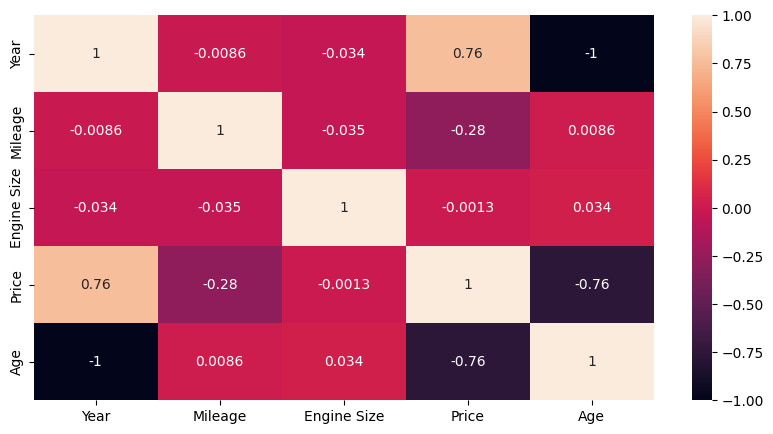

In [51]:
correlation_matrix = df[numerical_feature].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)

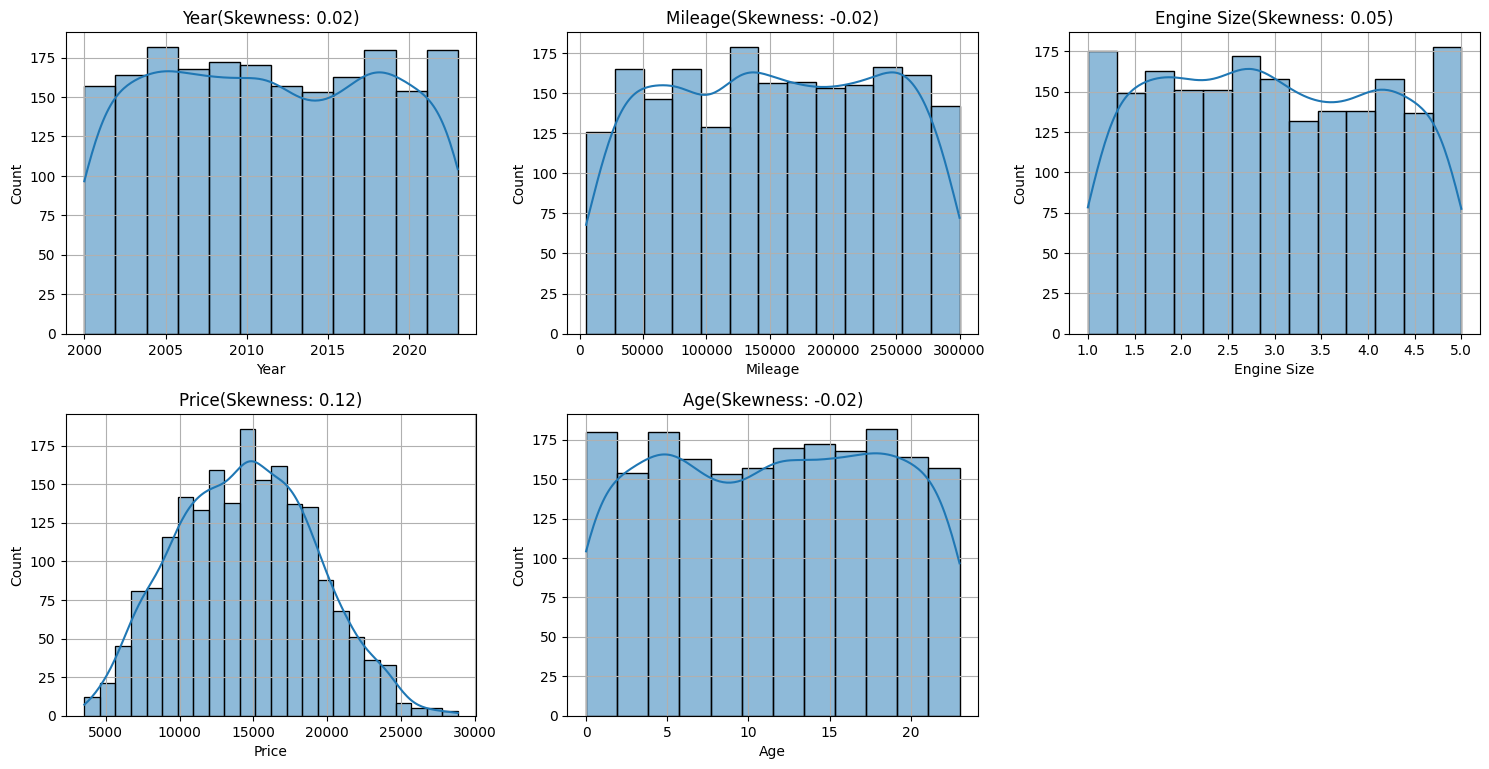

In [60]:
def plot_histogram(df, cols):
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[column], kde=True)
        skewness = df[column].skew()
        plt.grid(True)
        plt.title(f'{column}(Skewness: {skewness:.2f})')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_histogram(df, numerical_feature)

In [61]:
df.head(2)

,Car Brand,Model,Year,Mileage,Fuel Type,Engine Size,Transmission,Body Type,Color,Owner History,Price,Age
0,nissan,model d,2006,244586,diesel,1.1,automatic,coupe,red,third owner,6501.73,17
1,honda,model d,2006,89556,electric,4.4,automatic,coupe,gray,second owner,15860.51,17


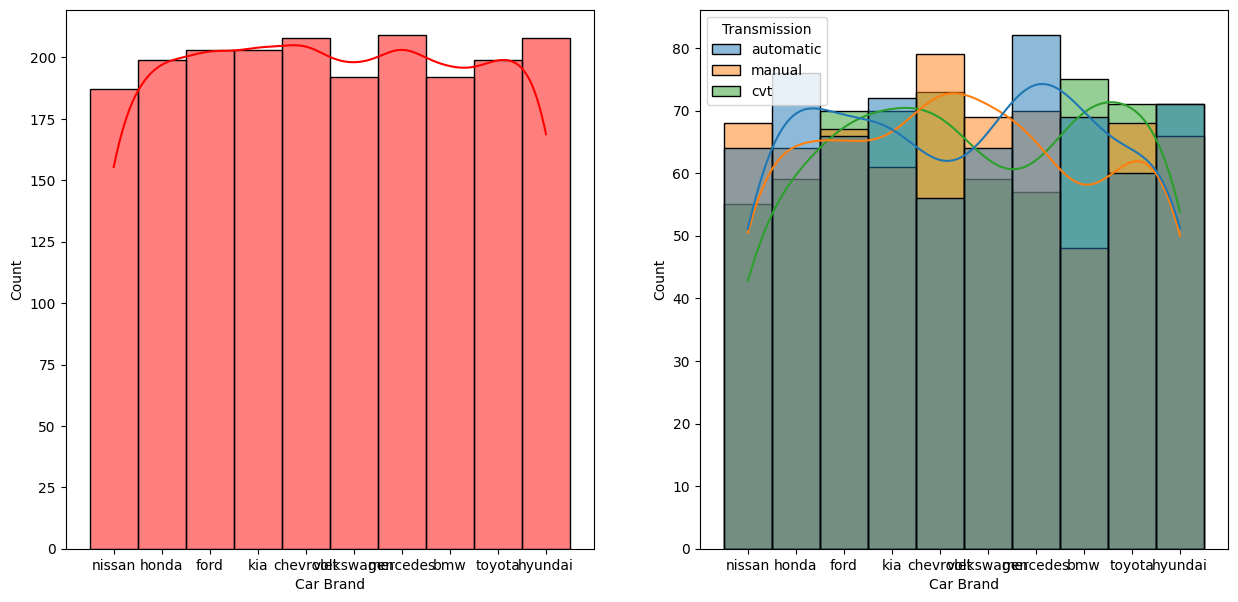

In [63]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Car Brand',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='Car Brand',kde=True,hue='Transmission')
plt.show()